# Data Visualization Project on I-94 interstate highway

Throughout the process goal is to determine the causes of traffic jam on I-94, like weather sitation or time of the day.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Visualizing and analyzing traffic volume

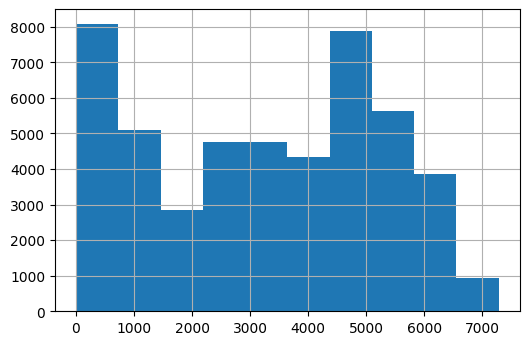

In [6]:
data['traffic_volume'].hist()
plt.show()

In [7]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [19]:
daytime = data.copy()[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour < 19)]
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [20]:
nighttime = data.copy()[(data['date_time'].dt.hour < 7) | (data['date_time'].dt.hour >= 19)]
nighttime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


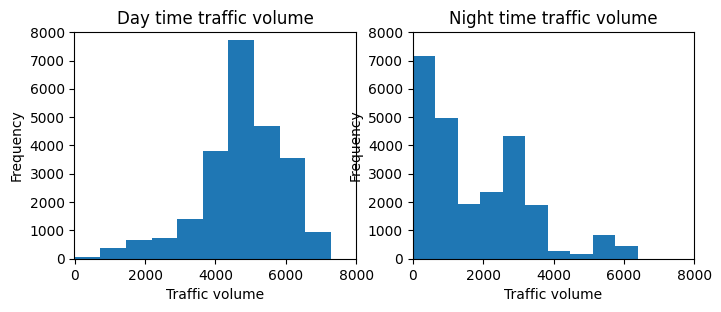

In [11]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Day time traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(-10,8000)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Night time traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(-10,8000)
plt.ylim(0,8000)

plt.show()

In [12]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The night time traffic volume is right skewed, so values are low in this period.
In contrast day time traffic volume is left skewed, which means most of the values are high.
As a result for determining traffic indicators we should focus on day time traaffic, because observed traffic is low in night time it cant give any insight.

# Time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

* Month
* Day of the week
* Time of day

## Time indicator - month

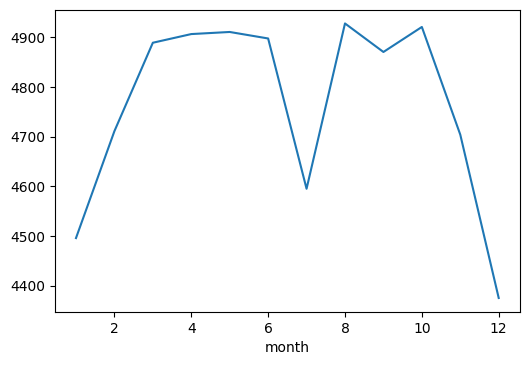

In [22]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

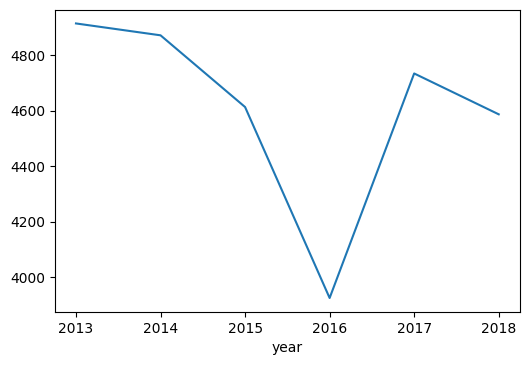

In [25]:
daytime['year'] = daytime['date_time'].dt.year
july= daytime[daytime['month'] == 7]
by_july = july.groupby('year').mean()
by_july['traffic_volume'].plot()
plt.show()


Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — this article from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time indicator - each day of week

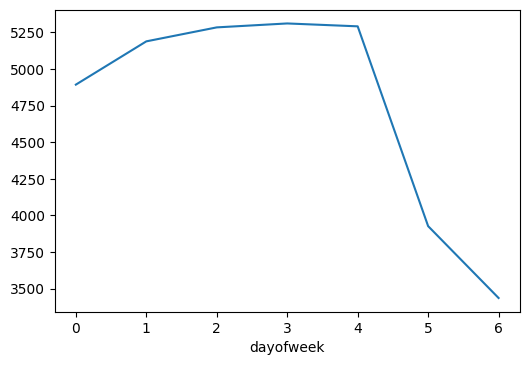

In [28]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()['traffic_volume'].plot()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.



## Time indicators - time of the day
As we will analyze the traffic volume in each hour of daytime , we will seperate dataset into weekend and business days, because weekend values are going to drag down the average value.

In [39]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4]
weekend = daytime.copy()[daytime['dayofweek'] >= 5]
hour_business = business_days.groupby('hour').mean()
hour_weekend = weekend.groupby('hour').mean()
print(hour_business['traffic_volume'])
print(hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


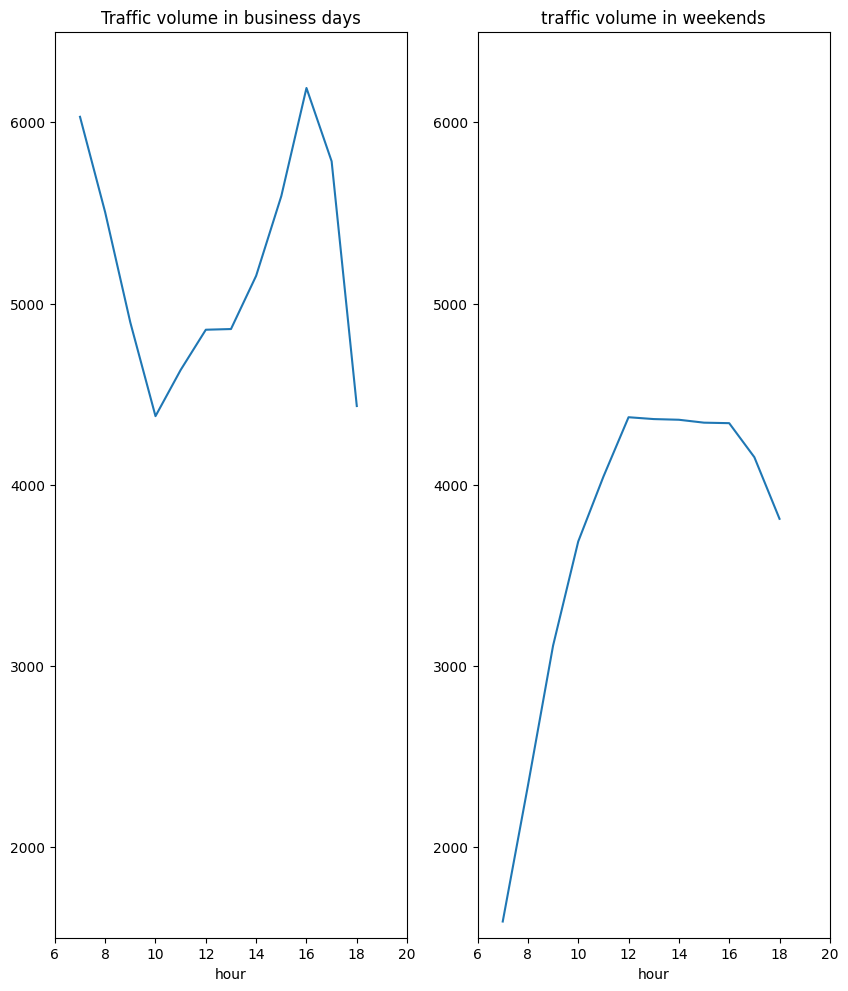

In [43]:
plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
hour_business['traffic_volume'].plot()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic volume in business days')

plt.subplot(1,2,2)
hour_weekend['traffic_volume'].plot()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('traffic volume in weekends')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

# Weather effect on traffic volume
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [47]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Traffic shows stringest correlation with temperature with the value 0.128317. Lets explore this correlation with scatter plot.

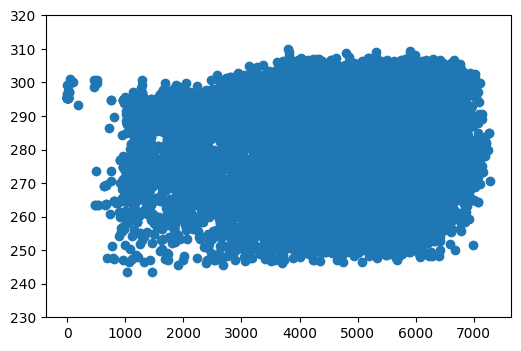

In [49]:
plt.scatter(x= daytime['traffic_volume'], y = daytime['temp'])
plt.ylim(230, 320)
plt.show()

From the scatter plot temperature does not seem like a solid indicator of traffic.
To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description

## Weather types

In [51]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

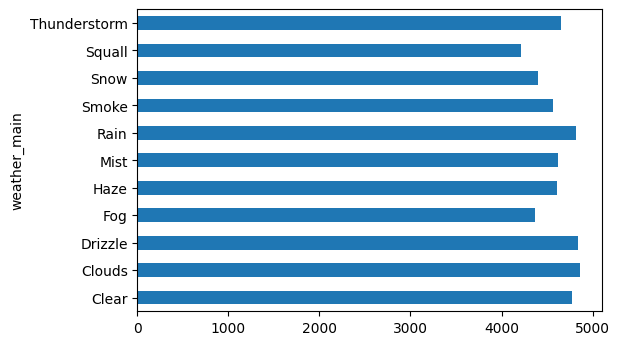

In [58]:
by_weather_main['traffic_volume'].plot.barh()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also plot by weather_description, which has a more granular weather classification.

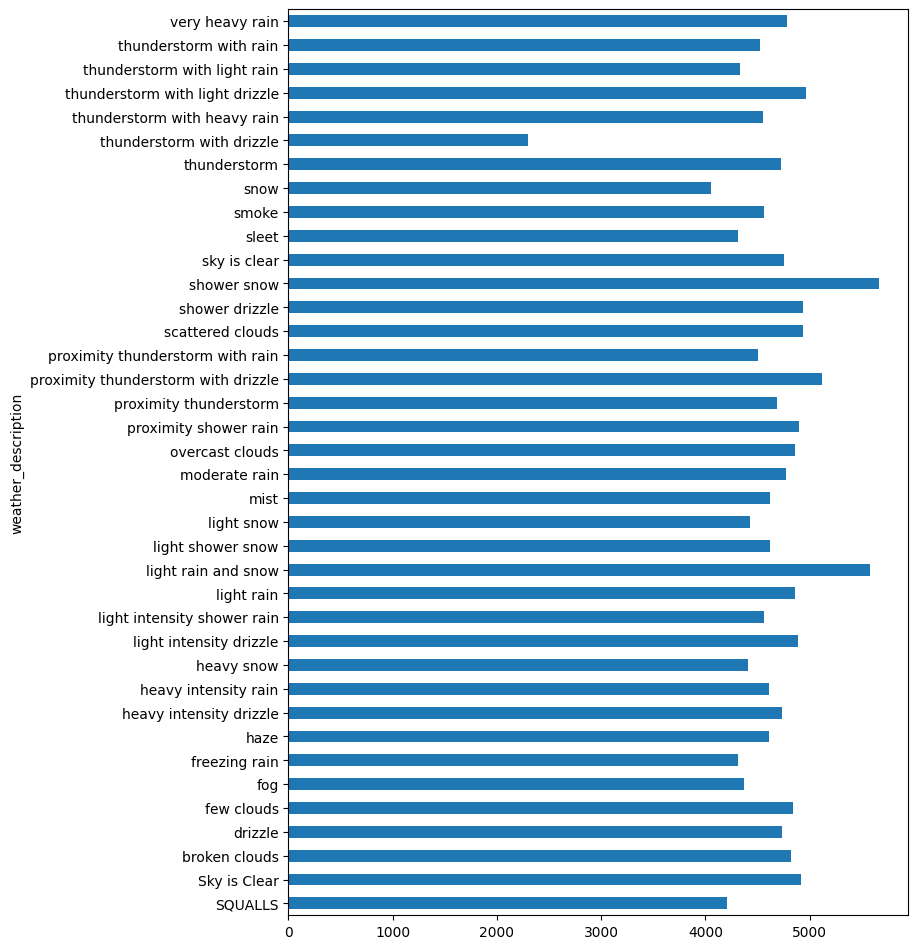

In [59]:
by_weather_description['traffic_volume'].plot.barh(figsize = (8, 12))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators
   1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
   2. The traffic is usually heavier on business days compared to the weekends.
   3. On business days, the rush hours are around 7 and 16.
* Weather indicators
  1. Shower snow
  2. Light rain and snow
  3. Proximity thunderstorm with drizzle